In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style ('whitegrid')
import matplotlib.pyplot as plt
import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('loan_data.csv')
data.head(2)

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0


The Dataset is a Loan data:
In this dataset, we would be determining crtiterias/factors that is/are responsible to pay back loans..
i.e The chances of paying back loans based on the Features captured in the dataset....

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


We have a total data of 9,578 captured in the dataset, we can be sure that by the time we are done Cleaning the data the remaining data would have dropped through:
1. Dropping Null values
2. Removing Outliers
3. Adusting/improving on data not Normally distributed.

In [4]:
data.describe(include='all')

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
unique,NaN,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,debt_consolidation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,3957,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.804970,NaN,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,NaN,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,NaN,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,NaN,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,NaN,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,NaN,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000


In [5]:
# data.isnull().sum()

<AxesSubplot:>

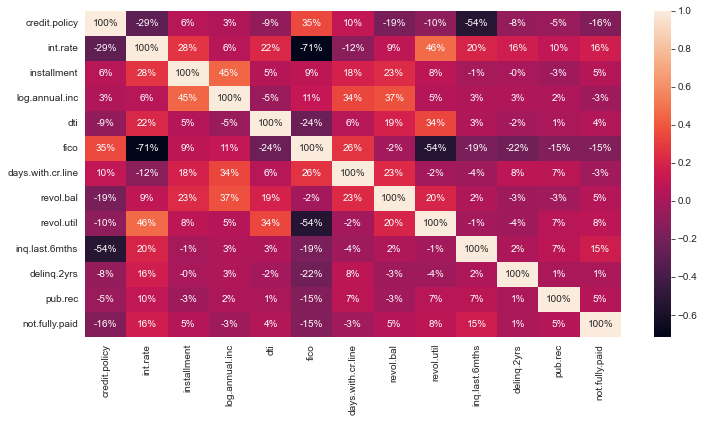

In [6]:
plt.figure(figsize=(12,6))
sns.heatmap(data.corr(), annot=True,fmt='.0%')

The reasons why clients are requesting loans is highlighted in the "Purpose" Column and has 7-Unique values
1. Debt Consolidation
2. Credit Card
3. All Other
4. Home Improvement
5. Small business
6. Major Business
7. Educational

In [7]:
data.groupby (['purpose']).mean().sort_values(['int.rate', 'installment'],ascending=False)

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
purpose,,,,,,,,,,,,,
small_business,0.799677,0.138087,433.826607,11.146216,10.793296,719.988691,4892.115778,27581.203554,40.070436,1.933764,0.155089,0.056543,0.277868
debt_consolidation,0.814506,0.126595,358.984390,10.912909,14.076462,703.871367,4533.037139,17146.710639,54.125504,1.461461,0.163255,0.070508,0.152388
educational,0.740525,0.119907,217.547201,10.549956,11.344927,708.282799,4008.595724,10828.897959,38.801166,1.854227,0.157434,0.043732,0.201166
credit_card,0.808241,0.119738,319.500713,11.047230,14.099398,709.626783,4857.005943,23180.020602,53.600475,1.387480,0.151347,0.072108,0.115689
home_improvement,0.813990,0.117507,337.071590,11.201979,10.197504,724.806041,5201.995562,17328.756757,34.274626,1.941176,0.136725,0.066773,0.170111
all_other,0.787216,0.116771,244.937542,10.845313,11.079498,715.344058,4311.706153,12883.039897,39.712321,1.646504,0.179751,0.048048,0.166023
major_purchase,0.848970,0.114171,243.483913,10.844895,10.159886,722.503432,4325.969108,7281.453089,32.457895,1.562929,0.173913,0.048055,0.112128


Measuring by the 'Mean Purpose' it is observed that:

-Small business
-Debt Consolidation
-Educational,
Have the highest "Interest Rate and Installments"

Checking if the Numerical columns are Normally Distributed:

In [8]:
# sns.distplot(data['credit.policy'])
# sns.distplot(data['int.rate'])
# sns.distplot(data['installment'])
# sns.distplot(data['log.annual.inc'])
# sns.distplot(data['dti'])
# sns.distplot (data['fico'])
# sns.distplot (data['days.with.cr.line'])
# sns.distplot (data['revol.bal'])
# sns.distplot (data['revol.util'])
# sns.distplot (data['inq.last.6mths'])
# sns.distplot (data['delinq.2yrs'])
# sns.distplot (data['pub.rec'])


Checking the numerical Columns Individually to be sure they are normally distributed and adusting the data to be Normally distributed in cases they are not

Checking if the Interest Rate column is Normally Distributed:

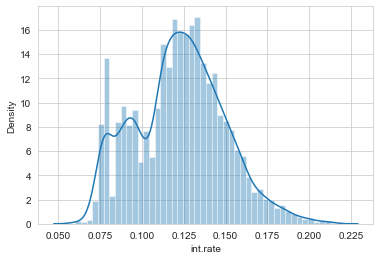

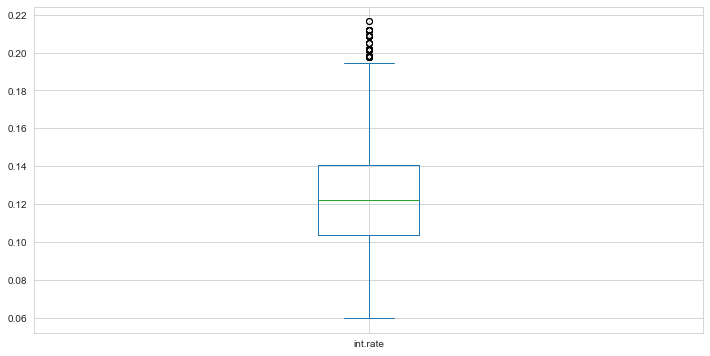

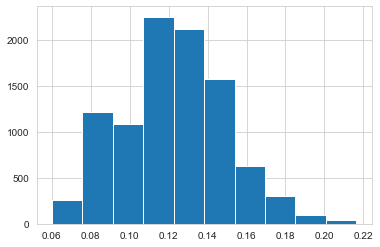

In [9]:
sns.distplot(data['int.rate'])
plt.show()
data['int.rate'].plot.box(figsize=(12,6))
plt.show()
plt.hist(data['int.rate'])
plt.show()

It can be inferred from the Interst Rate box plot that we have some outliers which would impact our predictions, I would be removing the Outliers so that the model is not impacted by the "Unusually/unexpectedly High Interest Rates" 

Removing the Outliers From the Interest Rate Column

In [10]:
data.drop ((data[data['int.rate']>0.19]).index, inplace=True)

Checking if the Installment column is Normally Distributed:

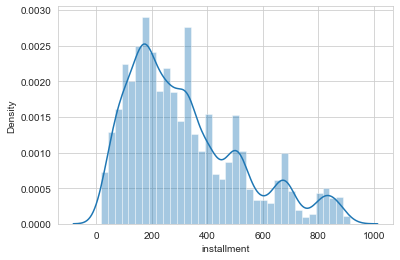

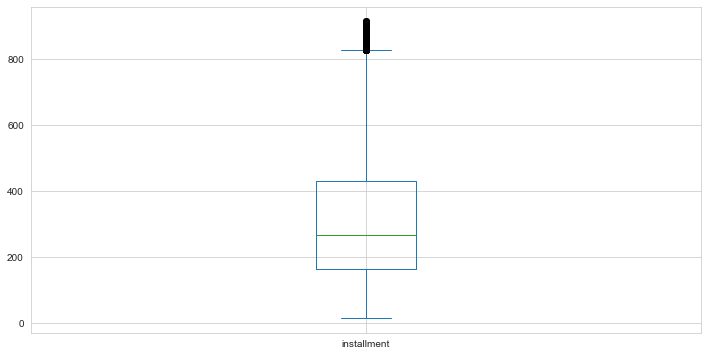

(array([1234., 2034., 1773., 1431.,  850.,  885.,  283.,  515.,  202.,
         277.]),
 array([ 15.67 , 105.545, 195.42 , 285.295, 375.17 , 465.045, 554.92 ,
        644.795, 734.67 , 824.545, 914.42 ]),
 <BarContainer object of 10 artists>)

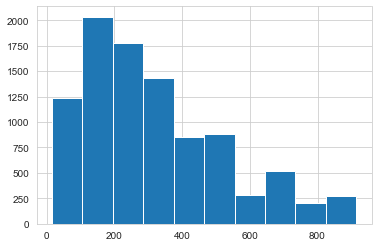

In [11]:
sns.distplot(data['installment'])
plt.show()
data['installment'].plot.box(figsize=(12,6))
plt.show()
plt.hist(data['installment'])

From the installment column, we can infer that we have some ouliers in the Installment column and this could make our model biased if not addressed.

Removing the Outliers From the Installment Column

In [12]:
data.drop((data[data['installment']>750]).index, inplace=True)

Checking if the Interest Rate column is Normally Distributed:

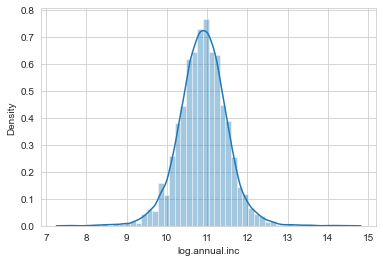

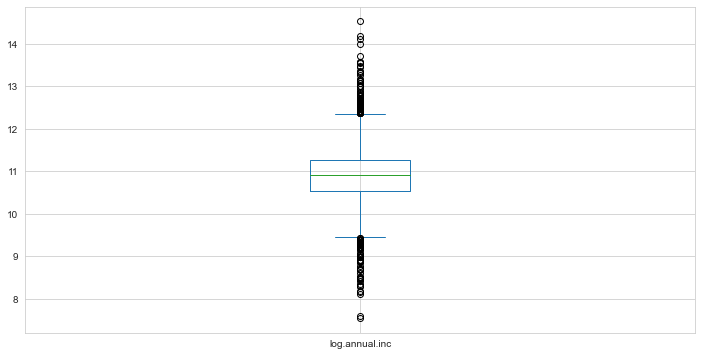

In [13]:
sns.distplot(data['log.annual.inc'])
plt.show()
data['log.annual.inc'].plot.box(figsize=(12,6))
plt.show()

From the Log annual Inc column, we can infer that we have both "High and low log values" and this would largely affect our model if not taken care of....

Removing the Outliers From the Log Annual Inc Column

In [14]:
data.drop ((data[data['log.annual.inc']>12]).index, inplace=True)
data.drop ((data[data['log.annual.inc']<9.5]).index, inplace=True)

Checking if the dti column is Normally Distributed:

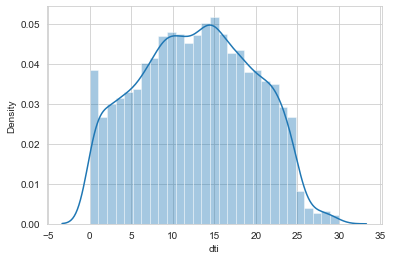

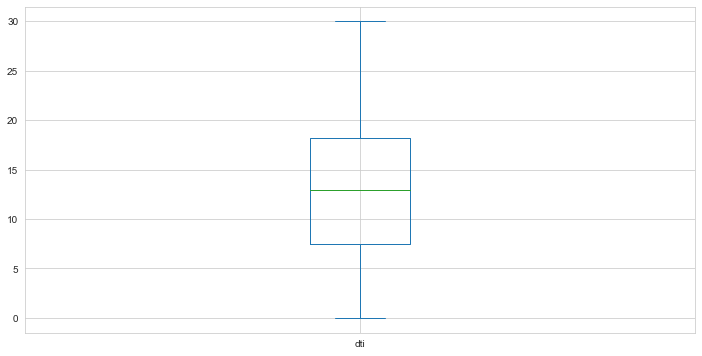

In [15]:
sns.distplot (data['dti'])
plt.show()
data['dti'].plot.box(figsize=(12,6))
plt.show()

Checking if the FICO column is Normally Distributed:

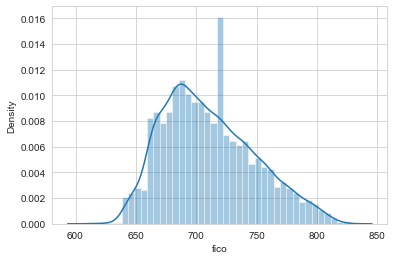

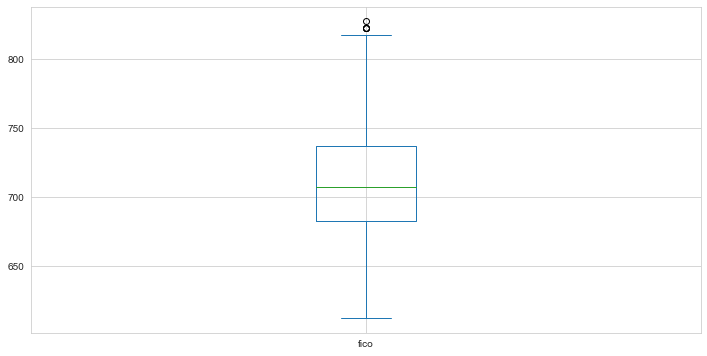

In [16]:
sns.distplot (data['fico'])
plt.show()
data['fico'].plot.box(figsize=(12,6))
plt.show()

It can be observed that we have very only a few outlier to be removed from the FICO column.

Removing the Outliers From the FICO Column

In [17]:
data.drop((data[data['fico']>800]).index, inplace=True)

Checking if the Days With Credit Line column is Normally Distributed:

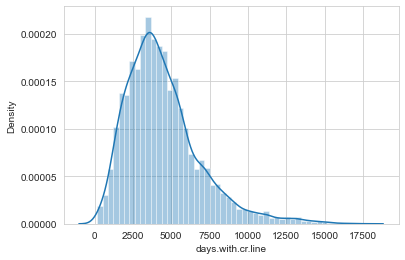

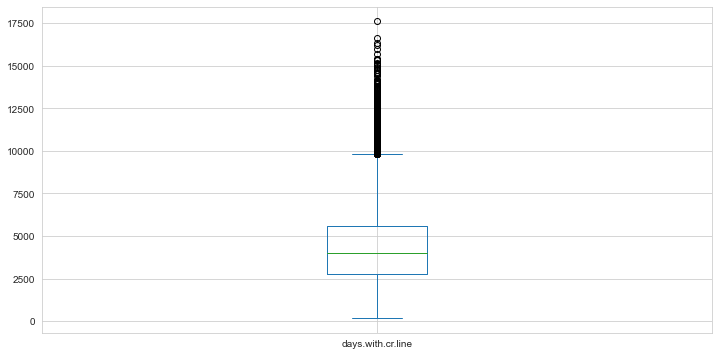

In [18]:
sns.distplot(data['days.with.cr.line'])
plt.show()
data['days.with.cr.line'].plot.box(figsize=(12,6))
plt.show()

From the box plot visualization, it is evident that we have a huge amount of outlier in the "Days with Credit Line column", This could be due to delayed payment of loans by customers which would impact the rate of interest they would be 

Removing the Outliers From the Log Annual Inc Column

In [19]:
data.drop ((data[data['days.with.cr.line']>9000]).index, inplace=True)

Checking if the revol.bal column is Normally Distributed:

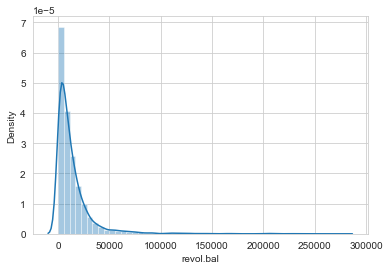

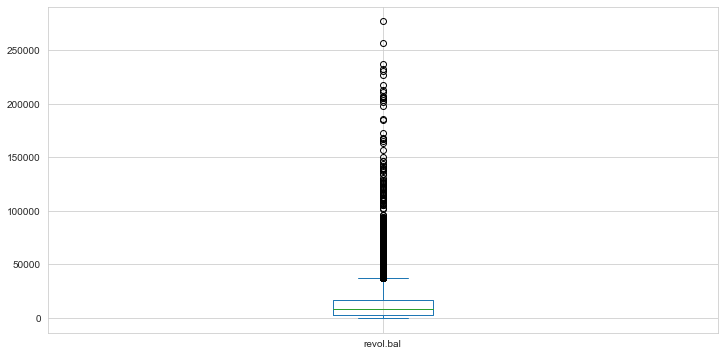

In [20]:
sns.distplot(data['revol.bal'])
plt.show()
data['revol.bal'].plot.box(figsize=(12,6))
plt.show()

From the Normal Visualization, it can be inferred that the "revol.bal" Column is not normally distributed as the values fall more to the Left side and the values ranges from 0-50000.... 

Removing the Outliers From the Revol Bal Column

In [21]:
data.drop((data[data['revol.bal']>5000]).index, inplace=True)

Checking if the revol.util column is Normally Distributed:

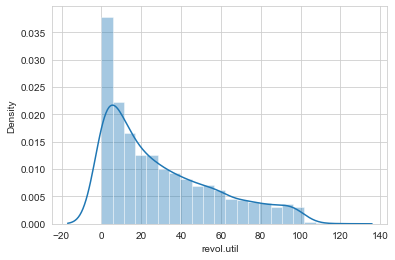

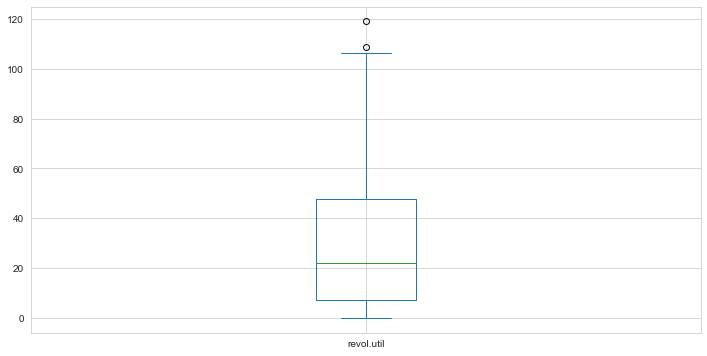

In [22]:
sns.distplot(data['revol.util'])
plt.show()
data['revol.util'].plot.box(figsize=(12,6))
plt.show()

Removing the Outliers From the Revol util Column

In [23]:
data.drop((data[data['revol.util']>100]).index, inplace=True)

Checking if the Inquiry Inquiry Last 6-Months column is Normally Distributed:

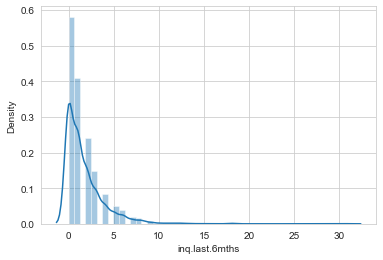

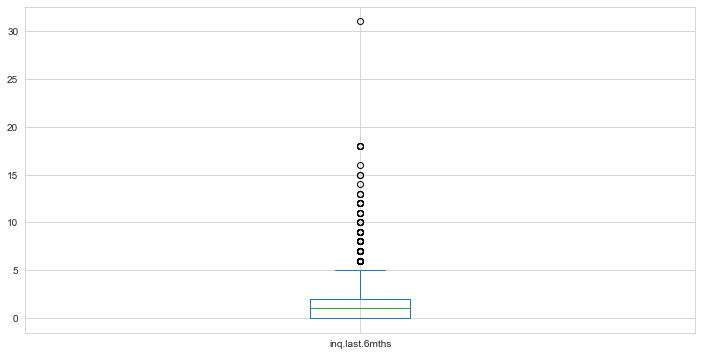

In [24]:
sns.distplot(data['inq.last.6mths'])
plt.show()
data['inq.last.6mths'].plot.box(figsize=(12,6))
plt.show()

Removing the Outliers From the Inquiry Last 6-Months column:

In [25]:
data.drop((data[data['inq.last.6mths']>5]).index, inplace=True)

Removing the Outliers From the delinq.2yrs Column

In [26]:
# data['pub.rec'].nunique()

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2638 entries, 2 to 9576
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      2638 non-null   int64  
 1   purpose            2638 non-null   object 
 2   int.rate           2638 non-null   float64
 3   installment        2638 non-null   float64
 4   log.annual.inc     2638 non-null   float64
 5   dti                2638 non-null   float64
 6   fico               2638 non-null   int64  
 7   days.with.cr.line  2638 non-null   float64
 8   revol.bal          2638 non-null   int64  
 9   revol.util         2638 non-null   float64
 10  inq.last.6mths     2638 non-null   int64  
 11  delinq.2yrs        2638 non-null   int64  
 12  pub.rec            2638 non-null   int64  
 13  not.fully.paid     2638 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 309.1+ KB


At this point, we can say to a certain level that we have removed Outliers from the dataset to a certain extent and each numerical column can be said to be "Normally Distributed"

In [28]:
data.head(2)

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.0,3511,25.6,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.0,4740,39.5,0,1,0,0


We would be performing some Exploratory Data Analysis (EDA) to understand the Categorical column(s) present in our dataset

We would be Vizualizing the "Purpose column" Versus the "Not Fully Paid columns"

<AxesSubplot:xlabel='purpose', ylabel='count'>

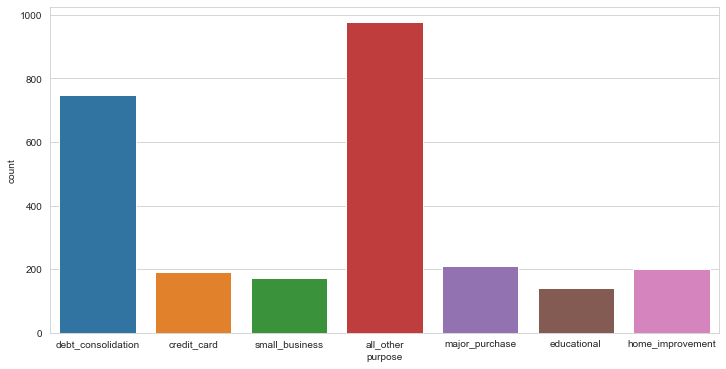

In [29]:
plt.figure(figsize=(12,6))
sns.countplot (x=data['purpose'])

<AxesSubplot:xlabel='purpose', ylabel='count'>

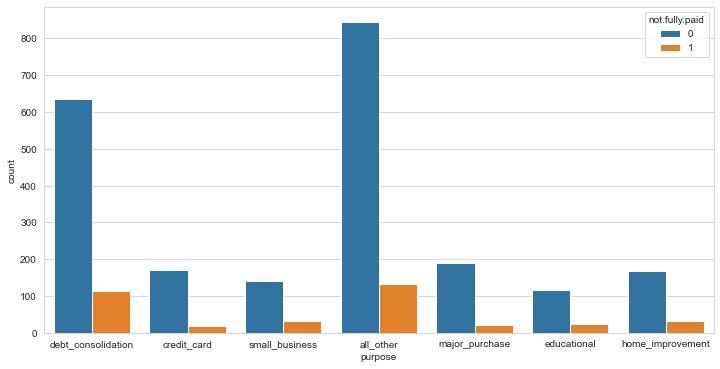

In [30]:
plt.figure(figsize=(12,6))
sns.countplot (x=data['purpose'], hue=data['not.fully.paid'])

From the above Vizualization, it is evident that Clients with the "All other and Debt Consolidation" are Defaulting more with the Loan payment..

We can relate with this, in the sense that this clients are most likely getting this loan to settle basic things as a result of "Income Not to adequately settle Basic needs"

Also, 
Clients requesting loans for the purpose of:

-Credit Card,
-Major Purpose
-Small Business
-Educational are more likely to get access to the loan.

<AxesSubplot:xlabel='purpose', ylabel='int.rate'>

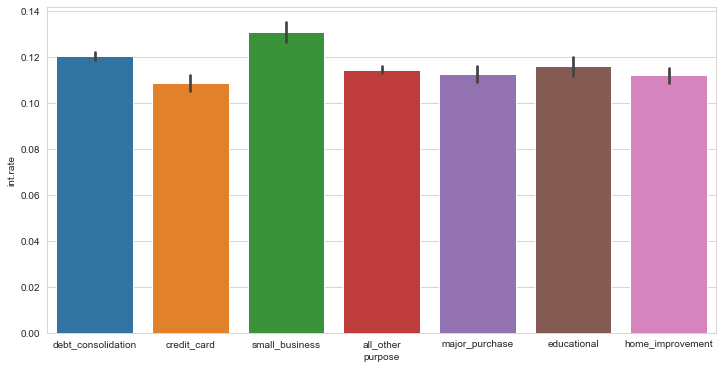

In [31]:
plt.figure(figsize=(12,6))
sns.barplot (x=data['purpose'], y=data['int.rate'])

From the Visualization, it can be inferred that "Small Business" and the "Debt Consolidation" Column have the highest Interest Rates. 

This is reasonable because clients requesting this kinds of loans would be investing them in their business and are most likely going to have more time (Medium or long term) to pay back the loan which would most likely attract more interest..

These categories of customers would most likely pay back their loans because they most have dropped collaterals to get the loan.

<AxesSubplot:xlabel='purpose', ylabel='count'>

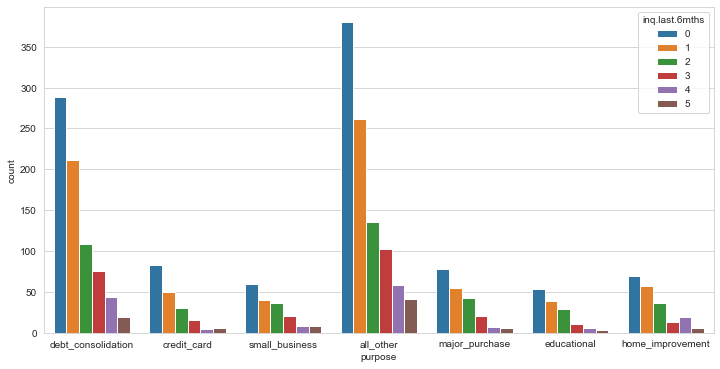

In [32]:
plt.figure(figsize=(12,6))
sns.countplot (x=data['purpose'], hue=data['inq.last.6mths'])

From the visualiztion, it can be inferred that clients have been Inquiring loans more for the Purpose of "All other" and for "Debt Consolidation" in the Last-6-Months..

This is most likey due to Not enough funds to attend to basic needs which is most likely an Impact as a result of the "High Rise in Cost/Standard of Living"...

<AxesSubplot:xlabel='purpose', ylabel='installment'>

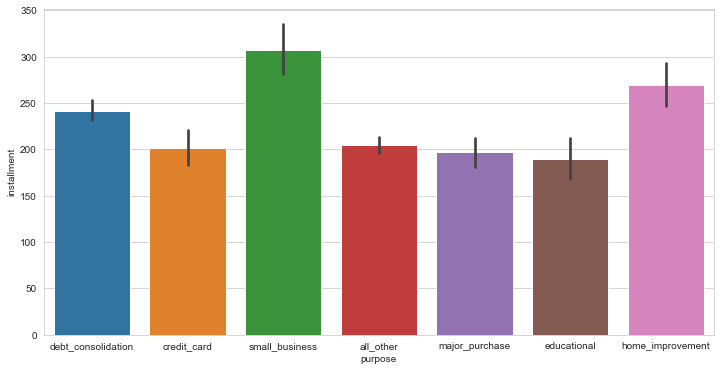

In [33]:
plt.figure(figsize=(12,6))
sns.barplot (x=data['purpose'], y=data['installment'])

From the Visualization, it can be inferred that "Small Business" and the "Home Improvement" Column have the highest Installment Rates. 

Hypothesis to work with

our hypothesis are as follows:

Clients with purpose Small business,
Clients with purpose of Major Purchase,
Clients with purpose of Home Improvement,
and
Clients with purpose of Credit card, are more likely to pay back the loan as expected.


Loan approval shold be greatly dependant on the "Purpose of the Loan"

To approve a loan we must be sure of "THE PURPOSE OF THE LOAN i.e What is the intended use of this loan.

Converting the Purpose column into Dummy variables so that our model would be able to handle the data and make proper prediction.

Building The Model

In [34]:
data1 = pd.get_dummies (data['purpose'], drop_first=True)

In [35]:
data2 = data.drop(['purpose'], axis=1)

The next line of code is to "Concatinate" my Dummy columns and the rest of the numerical data as a whole.

In [36]:
data3 = pd.concat([data1, data2], axis=1)

In [37]:
data3.head(2)

,credit_card,debt_consolidation,educational,home_improvement,major_purchase,small_business,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
2,0,1,0,0,0,0,1,0.1357,366.86,10.373491,11.63,682,4710.0,3511,25.6,1,0,0,0
4,1,0,0,0,0,0,1,0.1426,102.92,11.299732,14.97,667,4066.0,4740,39.5,0,1,0,0


I would be categorizing the dataset into:
-Features
and
-Target

In [38]:
x = data3.drop (['not.fully.paid'], axis=1)
y = data3['not.fully.paid']

At this point, i would be "Standard Scaling" our Feature columns so that all values can be on the appropriate scale.

In [39]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler ()
sc_x.fit (x)
x_scaled = sc_x.transform (x)

I would be splitting my cleaned data into:
-Train data
-Test data

In [40]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split (x_scaled, y, test_size=0.3, random_state=0)

<!-- Applying the Logistic regression Model to my Train data -->

In [41]:
# from sklearn.linear_model import LogisticRegression
# log_reg = LogisticRegression()
# log_reg.fit (x_train, y_train)

<!-- Predicting my Test data to confirm how well the model is doing -->

In [42]:
# y_pred = log_reg.predict (x_test)

In [43]:
# from sklearn.model_selection import ShuffleSplit
# from sklearn.model_selection import cross_val_score
# cv = ShuffleSplit (n_splits=5, test_size=0.3, random_state=0)
# cross_val_score (estimator=LogisticRegression(), X=x_scaled, y=y, cv=cv)

In [44]:
# from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
# print('Classification_Report', classification_report(y_test, y_pred))

# print('Accuracy_Score', accuracy_score(y_test, y_pred))

# conf_mat = confusion_matrix(y_test, y_pred)
# sns.heatmap (conf_mat,annot=True)

Applying the RandomForestClassifier on the Splitted data

In [45]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=100)
forest.fit (x_train, y_train)
forest_pred = forest.predict (x_test)

We would be getting the "Best Parameters" for our RandomForestClassifier Model

In [46]:
from sklearn.model_selection import GridSearchCV
parameters = ({'n_estimators':[100, 120, 150, 180, 200,220,250],'criterion':['gini', 'entropy']})

grid_search = GridSearchCV(estimator=RandomForestClassifier(), param_grid=parameters)
grid_search.fit(x_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'n_estimators': [100, 120, 150, 180, 200, 220, 250]})

In [47]:
print(grid_search.best_params_)
print(grid_search.best_score_)

{'criterion': 'gini', 'n_estimators': 220}
0.8596953050611587


Parameter Tunning for the RandomForestClassifier Model to get improved prediction(s) from our model

In [48]:
# Implementing our best Parameters
from sklearn.ensemble import RandomForestClassifier
forest_param = RandomForestClassifier(n_estimators=200, criterion='gini')
forest_param.fit (x_train, y_train)
forest_param_pred = forest_param.predict (x_test)

In [49]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
cv = ShuffleSplit (n_splits=5, test_size=0.3, random_state=0)
cross_val_score (estimator=RandomForestClassifier(), X=x_scaled, y=y, cv=cv)

array([0.85606061, 0.85479798, 0.85732323, 0.86868687, 0.85984848])

Classification_Report               precision    recall  f1-score   support

           0       0.86      1.00      0.92       679
           1       0.50      0.02      0.03       113

    accuracy                           0.86       792
   macro avg       0.68      0.51      0.48       792
weighted avg       0.81      0.86      0.80       792

Accuracy_Score 0.8573232323232324


<AxesSubplot:>

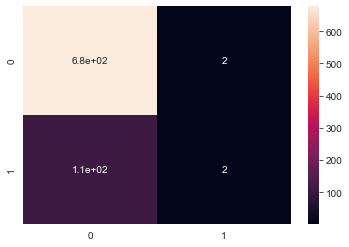

In [50]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
print('Classification_Report', classification_report(y_test, forest_pred))

print('Accuracy_Score', accuracy_score(y_test, forest_pred))

conf_mat = confusion_matrix(y_test, forest_pred)
sns.heatmap (conf_mat,annot=True)

<AxesSubplot:>

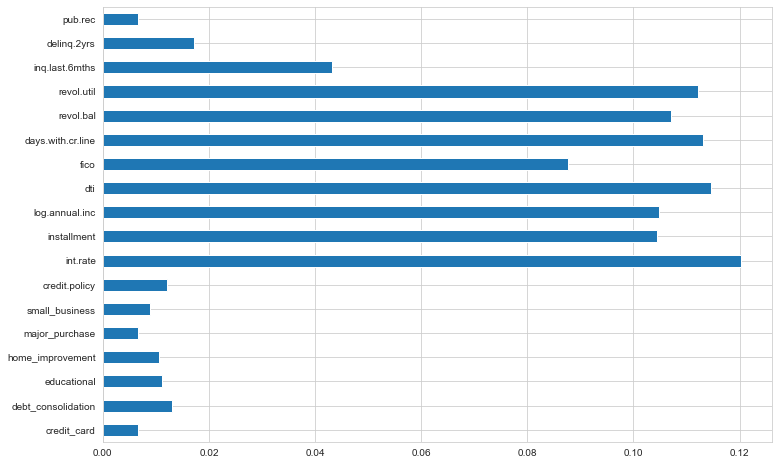

In [51]:
importances=pd.Series(forest.feature_importances_, index=x.columns)
importances.plot(kind='barh', figsize=(12,8))

In [52]:
pd.DataFrame(x_scaled).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,-0.278594,1.591056,-0.237629,-0.286417,-0.294093,-0.264920,0.448027,0.728463,0.956071,-0.617340,0.275363,-0.851429,0.638361,0.908253,-0.150463,-0.197982,-0.334004,-0.227907
1,3.589458,-0.628513,-0.237629,-0.286417,-0.294093,-0.264920,0.448027,0.991985,-0.824625,1.229528,0.763676,-1.227824,0.292449,1.700236,0.358476,-0.923365,1.337917,-0.227907
2,-0.278594,1.591056,-0.237629,-0.286417,-0.294093,-0.264920,0.448027,1.259327,-0.210010,0.062447,-0.840153,-1.227824,-0.183425,1.119621,1.724191,-0.923365,-0.334004,3.506371
3,-0.278594,-0.628513,-0.237629,-0.286417,-0.294093,3.774726,0.448027,-1.727260,-0.892766,1.654622,-0.474649,0.779613,0.463256,0.592491,-0.912041,-0.923365,1.337917,-0.227907
4,-0.278594,-0.628513,-0.237629,-0.286417,-0.294093,-0.264920,0.448027,0.575696,-0.994842,-0.319682,-1.094543,-1.102359,0.201115,0.070517,2.148917,-0.923365,-0.334004,-0.227907


Testing the model with some Features to ascertain its performance

In [53]:
# forest_param.predict([[-0.278594,1.591056,-0.237629,-0.286417,-0.294093,-0.26492,0.448027,0.728463,0.956071,-0.617340,0.275363,-0.851429,0.638361,0.908253,-0.150463,-0.197982,-0.334004,-0.227907
# ]])

forest_param.predict ([[-0.278594,1.591056,-0.237629,-0.286417,-0.294093,-0.264920,0.448027,1.259327,-0.210010,0.062447,-0.840153,-1.227824,-0.183425,1.119621,1.724191,-0.923365,-0.334004,3.506371
]])

array([1], dtype=int64)